In [2]:
from pulp import *
import pulp

## What is portfolio selection?

- Deciding the appropriate ratio of assets and equities with risk management to maximize the return of their portfolio.

Let $R_j$ be the return of the investment in next time period.
and let $x_j$ , $j$ = 1, ..., n be the collection of different assets and equity.

We can then let $R$ = $\sum_{j}$ $x_j R_j$, where $R$ is equal to the entire return of the portfolio.

Furthermore, the expected return or 'reward' of such portfolio is given by :

$\mathop{\mathbb{E}} R$ = $\sum_{j}$ $x_j \mathop{\mathbb{E}}R_j$
\\

### Important Factors to consider

- Reward : can be low, medium, high or mix of such categories
- Risk Tolerance: also low, medium, high or mix of such categories
- Time frame: the time a customer has for the investment vehicle to develop before selling is necessary
- Investment Objectives: the amount of money the customer is willing to lose/gain before exiting their position



All of these factors collectively decides whether the person should exit their positions. Investments with high rewards usually involves high risk also. Similarly, low rewards usually involves low risk investments, otherwise everyone would just buy low risk investment that have high returns. Risk tolerance can be calculated using using the mean absolute deviation from the mean (MAD):

$\mathop{\mathbb{E}}|R - \mathop{\mathbb{E}}R|$ = $\mathop{\mathbb{E}}|\sum_{j}$ $x_j \hat{R}_j|$ ,

where $\hat{R}_j = R_j - \mathop{\mathbb{E}} R_j$
\\

### Maximizing Returns

In order to maximize our return we would like to maximize our reward function while also minimizing our risk tolerance function. So in the form of a linear optimization problem we have:

maximize $\mu$$\sum_{j}$ $x_j \mathop{\mathbb{E}}R_j$ - $\mathop{\mathbb{E}}|\sum_{j}$ $x_j \hat{R}_j|$ 

subject to $\sum_j x_j = 1,$

$x_j \geq 0$ 

$j = 1,2, ..., n$

where $\mu$ is a variable to represents risk( high $\mu$ tends maximizes reward without consideration of risk, low $\mu$ tries to minimize risk). 
\\

### Example
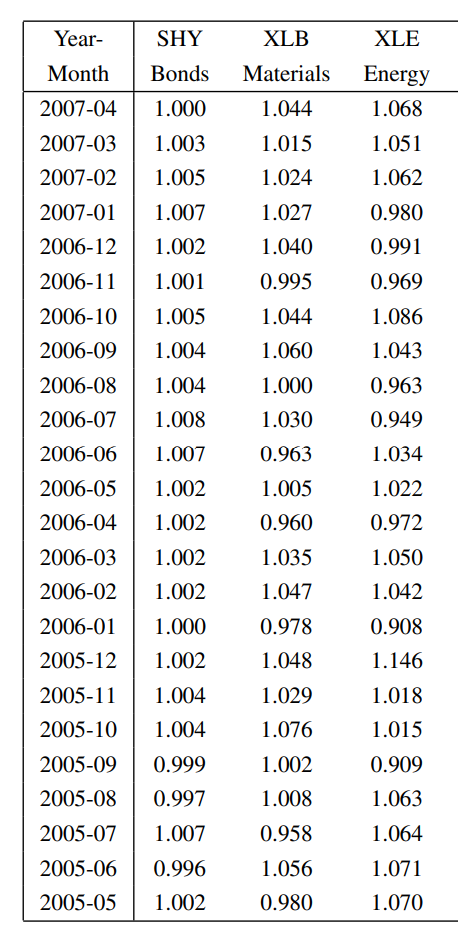

I have taken data from the Vanderbei textbook and attempted to formulate and solve as an LP problem by trying to find the optimal ratio for holdings of SHY, XLB, XLE securities.

We can estimate the mean or the risk function using $\mathop{\mathbb{E}} R_j = 1/T \sum_{t=1}^{T}R_j(t)$. $R_j(t)$ is the return on investment j over monthly time periods. While $T$ is the number of months considered in the calculation.

In [18]:
r1 = (1+ 1.003 + 1.005 + 1.007 + 1.002 +1.001+1.005+1.004+1.004+1.008+1.007+1.002+1.002+1.002+1.002+1+1.002+1.004+1.004+0.999+0.997+1.007+0.996+1.002)/ 24
print('Average return of SHY:' + str(round(r1, 4)))
r2 = (1.044+1.015+1.024+1.027+1.04+0.995+1.044+1.060+1+1.030+0.963+1.005+0.96+1.035+1.047+0.978+1.048+1.029+1.076+1.002+1.008+0.958+1.056+0.98)/24
print('Average return of XLB:' + str(round(r2, 4)))
r3 = (1.068+1.051+1.062+0.98+0.991+0.969+1.086+1.043+0.963+0.949+1.034+1.022+0.972+1.050+1.042+0.908+1.146+1.018+1.015+0.909+1.063+1.064+1.071+1.070)/24
print('Average return of XLE:' + str(round(r3, 4)))

Average return of SHY:1.0027
Average return of XLB:1.0177
Average return of XLE:1.0228


The returns from each of these securities is the average expected return for each dollar you invested in these products. For example you would get $0.02 per month for investing 1 dollar into XLB etc.

In [32]:
def optimum(u):
    SHY=pulp.LpVariable("SHY", lowBound=0)
    XLB=pulp.LpVariable("XLB", lowBound=0)
    XLE=pulp.LpVariable("XLE", lowBound=0)
    m1=pulp.LpVariable("m1", lowBound=0)
    m2=pulp.LpVariable("m2", lowBound=0)
    m3=pulp.LpVariable("m3", lowBound=0)
    m4=pulp.LpVariable("m4", lowBound=0)
    m5=pulp.LpVariable("m5", lowBound=0)

    optimum=pulp.LpProblem("max",pulp.LpMaximize)
    optimum+= -u*(r1*SHY + r2*XLB + r3*XLE)- 1/5*(m1+m2+m3+m4+m5), "objective function"
    optimum+= SHY+XLB+XLE <= 1, "first constraint"
    optimum+= SHY+XLB+XLE >= 1, "second constraint"
    optimum+= -m1 <= SHY*(1-r1) + XLB*(1.044-r2) + XLE*(1.068-r3) <= m1, "third constraint"
    optimum+= -m2 <= SHY*(1.003-r1) + XLB*(1.015-r2) + XLE*(1.051-r3) <= m2, "fourth constraint"
    optimum+= -m3 <= SHY*(1.005-r1) + XLB*(1.024-r2) + XLE*(1.062-r3) <= m3, "fifth constraint"
    optimum+= -m4 <= SHY*(1.007-r1) + XLB*(1.027-r2) + XLE*(0.980-r3) <= m4, "sixth constraint"
    optimum+= -m5 <= SHY*(1.002-r1) + XLB*(1.040-r2) + XLE*(0.991-r3) <= m5, "seventh constraint"

    optimum.solve()
    
    print("\nmax:")
    print(pulp.value(optimum.objective))

    print("decision variable values")

    for variable in optimum.variables():
      print(variable.name,"=",variable.varValue)

In [33]:
miu = [-2, -1, 0, 1, 2]

for risk in miu:
    print("for risk tolerance =", risk)
    optimum(risk)
    print(" ")

for risk tolerance = -2

max:
2.026697380665
decision variable values
SHY = 0.0
XLB = 0.58705701
XLE = 0.41294299
m1 = 0.034144838
m2 = 0.010100154
m3 = 0.01992604
m4 = 0.0
m5 = 0.0
 
for risk tolerance = -1

max:
1.0070835200000001
decision variable values
SHY = 0.0
XLB = 0.8208
XLE = 0.1792
m1 = 0.0297232
m2 = 0.0028736
m3 = 0.012232
m4 = 0.0
m5 = 0.0126416
 
for risk tolerance = 0

max:
-0.0013750000140000003
decision variable values
SHY = 1.0
XLB = 0.0
XLE = 0.0
m1 = 0.0
m2 = 0.00029166667
m3 = 0.0022916667
m4 = 0.0042916667
m5 = 0.0
 
for risk tolerance = 1

max:
-1.0040833333473334
decision variable values
SHY = 1.0
XLB = 0.0
XLE = 0.0
m1 = 0.0
m2 = 0.00029166667
m3 = 0.0022916667
m4 = 0.0042916667
m5 = 0.0
 
for risk tolerance = 2

max:
-2.006791666680667
decision variable values
SHY = 1.0
XLB = 0.0
XLE = 0.0
m1 = 0.0
m2 = 0.00029166667
m3 = 0.0022916667
m4 = 0.0042916667
m5 = 0.0
 


The best $\mu$ to pick is -2 as it provides the most return with allocations of 59% XLB and 41% XLE.

### Further Exploration

- figure out how to incorporate time frame/investment objectives into the LP problem
- find out other ways of calculating risk and see if the ratios of the equities changes
- since there are many types of investment vehicles (e.g. housing, businesses instead of just stocks): I want to try and figure out how to formulate LP problems that can involve a combination of different investment products
- understanding when $\mu$ values are too low/high
- putting the example table into a matrix to allow for more constraints to be considered and for efficiency